<center>
<img src="https://supportvectors.ai/logo-poster-transparent.png" width="400px" style="opacity:0.7">
</center>

In [1]:
%run supportvectors-common.ipynb


<div style="color:#aaa;font-size:8pt">
<hr/>
&copy; SupportVectors. All rights reserved. <blockquote>This notebook is the intellectual property of SupportVectors, and part of its training material. 
Only the participants in SupportVectors workshops are allowed to study the notebooks for educational purposes currently, but is prohibited from copying or using it for any other purposes without written permission.

<b> These notebooks are chapters and sections from Asif Qamar's textbook that he is writing on Data Science. So we request you to not circulate the material to others.</b>
 </blockquote>
 <hr/>
</div>



**Note:  This example has been taken from the [Inside Deep Learning book](https://www.manning.com/books/inside-deep-learning) Section 1.3**

In [2]:
import torch
import matplotlib.pyplot as plt
from typing import Tuple

# Implementing Gradient Descent

Objective: In this exercise, we will complete the implementation of the gradient descent optimization algorithm. 

This was given as a homework last week.

In [3]:
def f(x: torch.tensor) -> torch.tensor:
    return (x**2 + 3*x + 2)

## Plot the function

In [4]:
# Create a tensor 'Xs' with 100 evenly spaced values from -5 to 5,
Xs = torch.linspace(start=-5, end=5, steps=100)

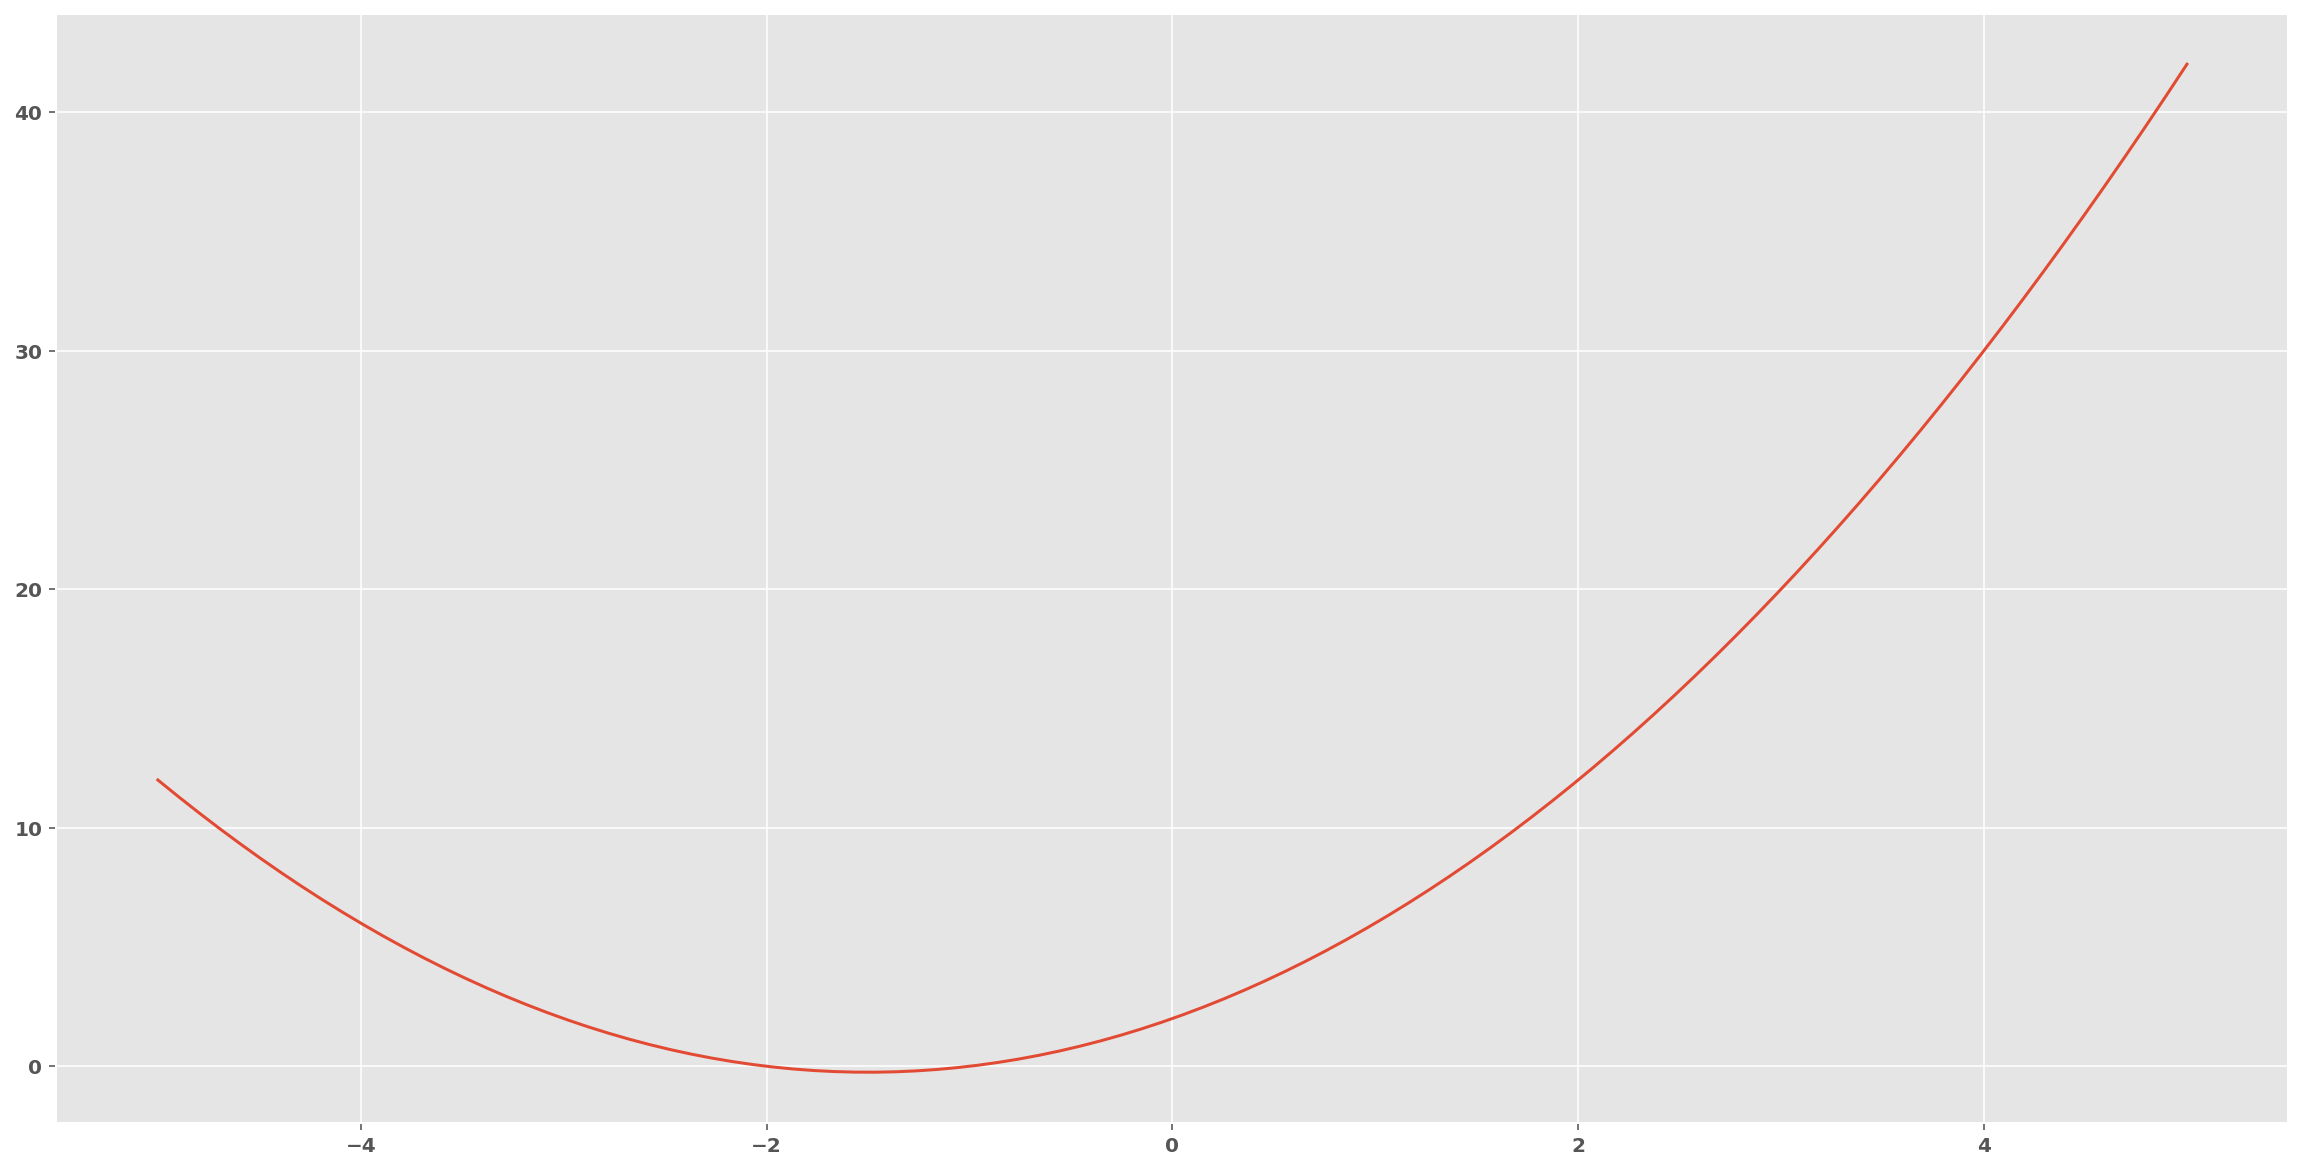

In [5]:
# plot f(Xs) vs Xs
plt.plot(Xs, f(Xs));

The missing code of the `gradient_descent` function from the homework has been filled here. 

In [6]:
import torch

def gradient_descent(x: torch.Tensor, eta: float, epsilon: float, func) -> Tuple[torch.Tensor, list]:
    """
    Performs gradient descent optimization to minimize a given function.

    This function iteratively updates the input tensor `x` by taking steps in the direction of the negative gradient 
    of the specified function `func`. The process continues until the change in the value of `x` is smaller than the 
    specified tolerance `epsilon`. The function also logs the values of `x` at each step.

    Args:
        x (torch.Tensor): The initial tensor to optimize. This tensor should require gradients.
        eta (float): The learning rate for the gradient descent.
        epsilon (float): The convergence threshold. The optimization stops when the change in `x` is less than this value.
        func (Callable): The function to minimize. 

    Returns:
        Tuple[torch.Tensor, list]: The optimized tensor and a log of tensor values at each step of the optimization.
    """
    # Initialize x_min to the initial value of x. This will be updated during gradient descent.
    x_min: torch.Tensor = x.clone()

    # Initialize x_min_prev to a large value to start the optimization loop.
    x_min_prev = x_min * 100

    # List to log the values of x during the optimization process.
    learning_log = []
    learning_log.append(x_min.detach().numpy())
    gradients = []
    
    # Iterate until the change in x is smaller than the tolerance epsilon.
    while torch.linalg.norm(x_min - x_min_prev) > epsilon:
        x_min_prev = x_min.clone()

        # Compute the value of the function 
        value = func(x)

        # perform backpropagation.
        value.backward()
        
        # Update x by taking a step in the direction of the negative gradient.
        # x.data -= eta * x.grad
        # # x.data = x.data - eta * x.grad
        x_grad = x.grad.clone().detach()
        print(x_grad)
        gradients.append(x_grad.numpy())

        with torch.no_grad():
            x -= eta * x.grad

        # Zero the gradients of x to prepare for the next iteration.
        x.grad.zero_()

        # Update x_min with the new value of x.
        x_min = x.clone()

        # Log the current value of x.
        learning_log.append(x_min.detach().numpy())

    return x_min, learning_log, gradients


In [7]:
# create a tensor x with a single value of your choice and turn on the gradient tracking
x = torch.tensor([10.0], requires_grad=True)

# learning rate
eta=0.001

# set a small value to decide how close you want to go to the argmin  
epsilon=1e-5

argmin, learning_log, gradients = gradient_descent(x, eta, epsilon, f)

print(argmin)

tensor([23.])
tensor([22.9540])
tensor([22.9081])
tensor([22.8623])
tensor([22.8166])
tensor([22.7709])
tensor([22.7254])
tensor([22.6799])
tensor([22.6346])
tensor([22.5893])
tensor([22.5441])
tensor([22.4990])
tensor([22.4540])
tensor([22.4091])
tensor([22.3643])
tensor([22.3196])
tensor([22.2749])
tensor([22.2304])
tensor([22.1859])
tensor([22.1416])
tensor([22.0973])
tensor([22.0531])
tensor([22.0090])
tensor([21.9650])
tensor([21.9210])
tensor([21.8772])
tensor([21.8334])
tensor([21.7898])
tensor([21.7462])
tensor([21.7027])
tensor([21.6593])
tensor([21.6160])
tensor([21.5727])
tensor([21.5296])
tensor([21.4865])
tensor([21.4436])
tensor([21.4007])
tensor([21.3579])
tensor([21.3151])
tensor([21.2725])
tensor([21.2300])
tensor([21.1875])
tensor([21.1451])
tensor([21.1028])
tensor([21.0606])
tensor([21.0185])
tensor([20.9765])
tensor([20.9345])
tensor([20.8927])
tensor([20.8509])
tensor([20.8092])
tensor([20.7676])
tensor([20.7260])
tensor([20.6846])
tensor([20.6432])
tensor([20.601

Finally lets see how the value of x_min has changed at each step of learning.

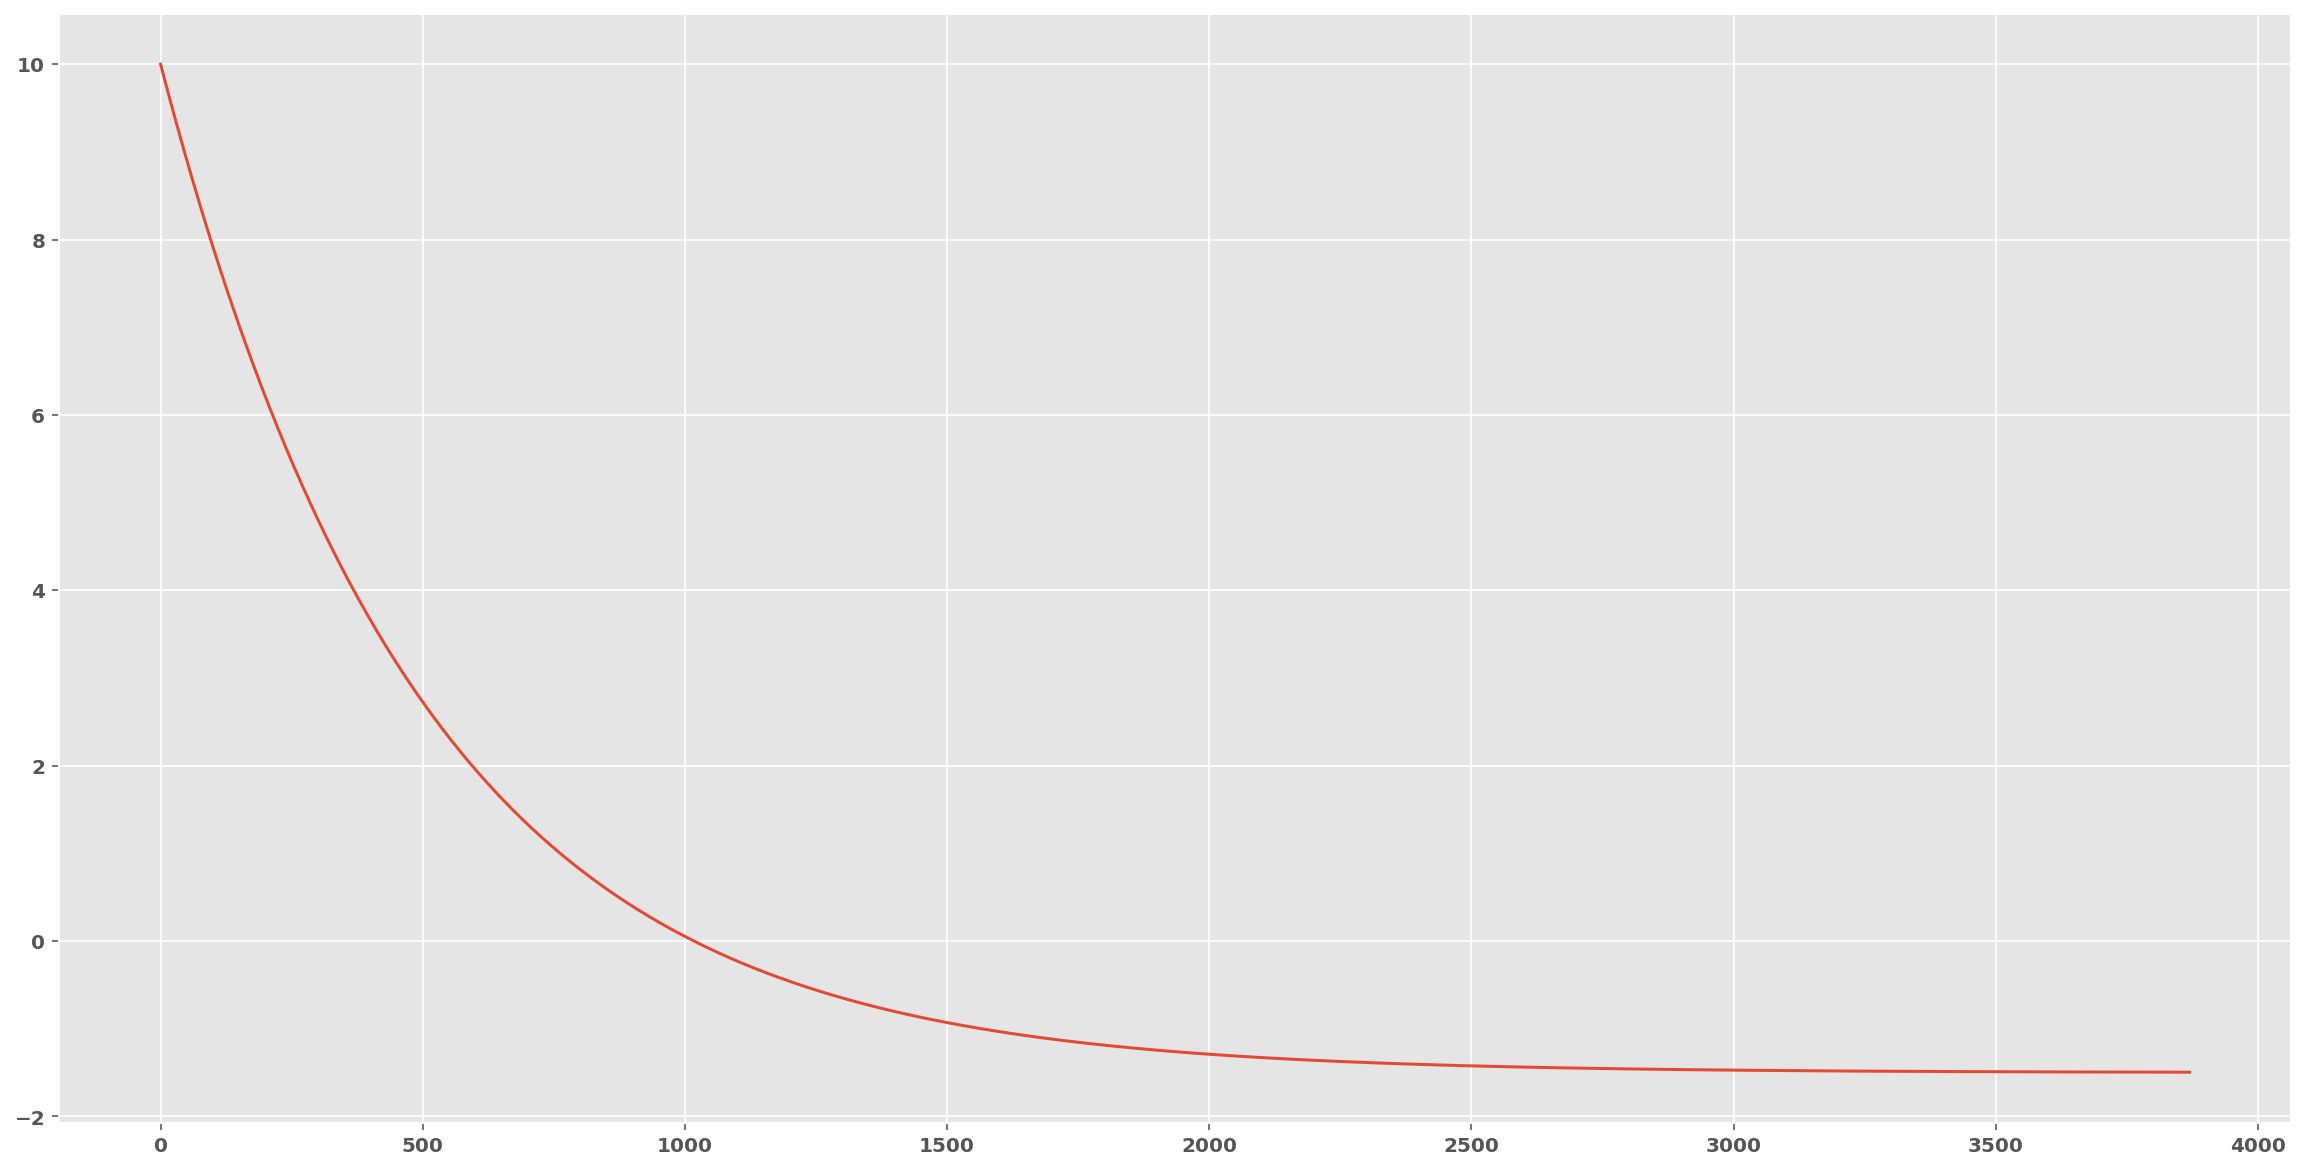

In [8]:
plt.plot(learning_log)

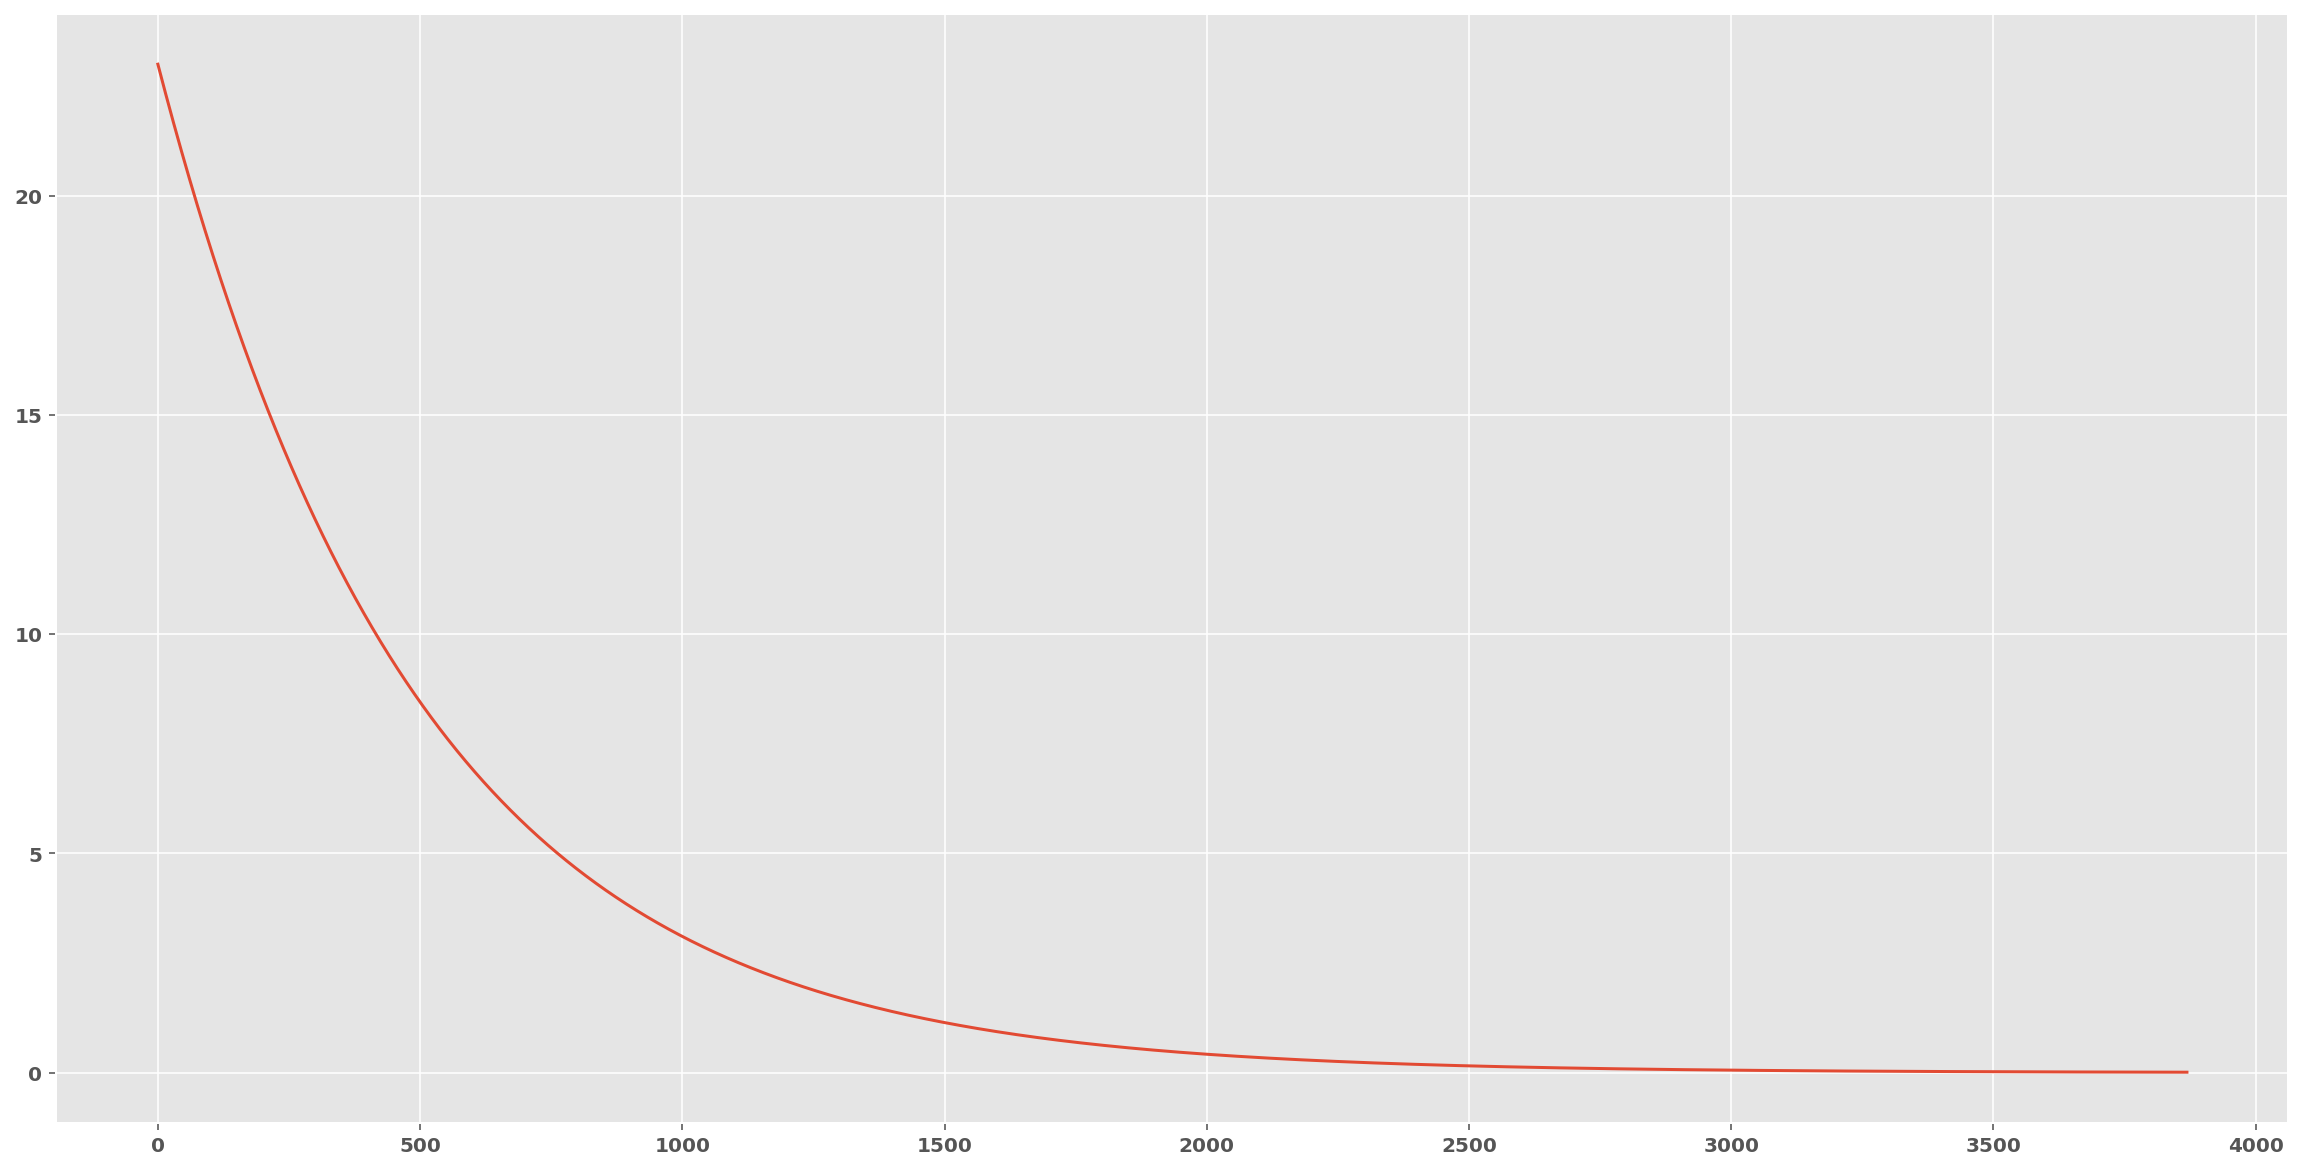

In [9]:
plt.plot(gradients)